# Baseline Staff

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from category_encoders.count import CountEncoder

## Data ingest (Carregar dados)

In [3]:
df_train = pd.read_csv('datasets/treino.csv')
df_test = pd.read_csv('datasets/teste.csv')

In [ ]:
y = df_train['preco']
X = df_train.drop(columns=['ID', 'preco'])


## Features-class-split (Separar dados em classe (y) e features (X))

In [4]:
y = df_train['preco']
X = df_train.drop(columns=['ID', 'preco'])
cat_cols = df_train.select_dtypes(include=['object']).columns[1:]

te = CountEncoder(cols=cat_cols, return_df=True)
X_pp = te.fit_transform(df_train.drop(columns=['ID', 'preco']), df_train['preco'])

X_pp = X_pp.fillna(0)

xgb_tuned = XGBRegressor(n_estimators= 1700, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.5, min_child_weight= 3) 
xgb_tuned.fit(X_pp, y)

X_test_pp = te.transform(df_test.drop(columns=['ID']))
X_test_pp = X_test_pp.fillna(0)

pred = xgb.predict(X_test_pp)

df_final = pd.concat([df_test[['ID']], pd.Series(pred, name='preco')], axis=1)
df_final.head()

df_final.to_csv('submission.csv', index=False) 

## CountEncoder (Transformar colunas qualitativas em quantitativas)

In [5]:
cat_cols = df_train.select_dtypes(include=['object']).columns[1:]

te = CountEncoder(cols=cat_cols, return_df=True)
X_pp = te.fit_transform(df_train.drop(columns=['ID', 'preco']), df_train['preco'])

## Fill NAN values (preencher células vazias com zero)

In [6]:
X_pp = X_pp.fillna(0)

## Model development (treino do modelo)

In [7]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_pp, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [13]:
cross_validate(xgb, X_pp, y, cv=5 , scoring = 'neg_mean_absolute_error')

{'fit_time': array([20.72739005, 14.05925179, 12.46613717, 10.30596089, 10.39402199]),
 'score_time': array([0.11774087, 0.06497216, 0.06764102, 0.08177686, 0.06970787]),
 'test_score': array([-27447.44848654, -27776.9627502 , -27419.58262113, -28078.66509503,
        -27644.96926975])}

## Feature Eng. (Aplicar mesmas transformações no dataset de teste)

In [8]:
X_test_pp = te.transform(df_test.drop(columns=['ID']))
X_test_pp = X_test_pp.fillna(0)

## Predict the test dataset (Prever preços) 

In [9]:
pred = xgb.predict(X_test_pp)

## Final solution (gerar base final para envio no kaggle)

In [9]:
df_final = pd.concat([df_test[['ID']], pd.Series(pred, name='preco')], axis=1)
df_final.head()

,ID,preco
0,24813264385557040124808779273028388499,72607.984375
1,295636316453795508942188530111300065666,100428.125000
2,101258309166227950735244624080888109884,95063.054688
3,28348734455782469411126661985772047409,78029.687500
4,193163160502972147671913739170248305797,117917.335938


In [10]:
df_final.to_csv('submission.csv', index=False) #Arquivo de submissão pronto para ser enviado.

# Modelo 1

Params: n_estimators= 1700, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.5, min_child_weight= 3

In [15]:
xgb_tuned = XGBRegressor(n_estimators= 1700, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.5, min_child_weight= 3) 
xgb_tuned.fit(X_pp, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1700,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [16]:
cross_validate(xgb_tuned, X_pp, y, cv=5 , scoring = 'neg_mean_absolute_error')

{'fit_time': array([163.151371  , 159.17933106, 150.11592674, 151.90661311,
        207.72365499]),
 'score_time': array([0.88276291, 0.62014103, 1.03657699, 0.8207128 , 0.59203911]),
 'test_score': array([-26154.63933659, -26267.77200115, -25789.06278024, -26403.18100797,
        -26116.15320651])}

In [18]:
MAE_tuned = [-26154.63933659, -26267.77200115, -25789.06278024, -26403.18100797,
        -26116.15320651]
np.mean(MAE_tuned)

-26146.161666492

In [19]:
pred = xgb_tuned.predict(X_test_pp)
df_final = pd.concat([df_test[['ID']], pd.Series(pred, name='preco')], axis=1)
df_final.head()

,ID,preco
0,24813264385557040124808779273028388499,67228.421875
1,295636316453795508942188530111300065666,118745.132812
2,101258309166227950735244624080888109884,91524.984375
3,28348734455782469411126661985772047409,83163.031250
4,193163160502972147671913739170248305797,118306.226562


In [20]:
df_final.to_csv('submission_tuned.csv', index=False) #Arquivo de submissão pronto para ser enviado.

In [21]:
X_pp

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,...,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,8.0,6140,958,33,2017,2017.0,55672.0,30073,4,6426,...,False,False,29230,25548,12239,26223,21250,33658,7903,0.0
1,8.0,212,68,37,2017,2017.0,47858.0,30073,4,4458,...,False,False,29230,25548,12239,26223,18196,33658,7903,0.0
2,14.0,4020,817,158,2012,2013.0,122323.0,30073,4,21910,...,True,False,29230,25548,27207,13223,18196,33658,31543,0.0
3,8.0,470,46,9,2020,2021.0,14207.0,30073,2,6426,...,False,False,29230,25548,12239,13223,18196,33658,31543,0.0
4,8.0,363,47,7,2015,2016.0,43760.0,30073,4,4458,...,False,False,29230,25548,12239,13223,18196,33658,7903,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,12.0,6140,199,51,2015,2015.0,73755.0,6631,4,21910,...,False,False,29230,13898,27207,26223,21250,33658,31543,0.0
39442,17.0,2375,64,55,2016,2017.0,78859.0,30073,4,6570,...,True,False,29230,25548,27207,13223,18196,33658,31543,0.0
39443,8.0,2246,1924,1825,2021,2022.0,9793.0,30073,4,21910,...,False,False,10216,13898,12239,26223,21250,5788,7903,0.0
39444,15.0,6140,958,15,2018,2019.0,51592.0,30073,4,21910,...,False,False,29230,25548,27207,13223,18196,33658,31543,0.0


# Meu Modelo 2
subsample = 0.8, objective = 'reg:squarederror', n_estimators = 1500, min_child_weight = 5, max_depth = 6, gamma = 0.4,eval_metric = 'rmse', eta = 0.1, colsample_bytree = 0.7, booster = 'gbtree'

In [30]:
# y = df_train['preco']
# X = df_train.drop(columns=['ID', 'preco'])
# cat_cols = df_train.select_dtypes(include=['object']).columns[1:]

# te = CountEncoder(cols=cat_cols, return_df=True)
# X_pp = te.fit_transform(df_train.drop(columns=['ID', 'preco']), df_train['preco'])

# X_pp = X_pp.fillna(0)

#xgb_tuned = XGBRegressor(n_estimators= 1700, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.5, min_child_weight= 3) 
xgb_tuned.fit(X_pp, y)

# X_test_pp = te.transform(df_test.drop(columns=['ID']))
# X_test_pp = X_test_pp.fillna(0)

pred = xgb_tuned2.predict(X_test_pp)

df_final = pd.concat([df_test[['ID']], pd.Series(pred, name='preco')], axis=1)
df_final.head()

df_final.to_csv('submission.csv', index=False)

In [31]:
MAE_tuned2 = cross_validate(xgb_tuned2, X_pp, y, cv=5 , scoring = 'neg_mean_absolute_error')

In [34]:
print(MAE_tuned2)
print(np.mean(MAE_tuned2['test_score']))


{'fit_time': array([101.85734296,  91.18215299,  93.45906091, 112.13858294,
        89.98887205]), 'score_time': array([0.3050108 , 0.51249099, 0.50763798, 0.3975141 , 0.37474513]), 'test_score': array([-26884.9127774 , -27353.48382398, -26584.8522271 , -27359.17968236,
       -27014.21338493])}
-27039.328379152394


## Modelo 3: Parametros do 1 com log(preco)

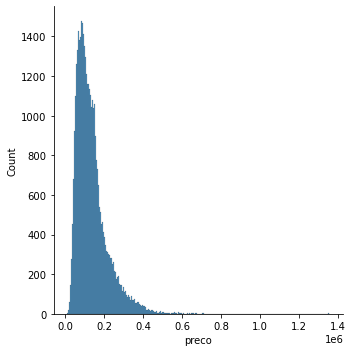

In [44]:
import seaborn as sns
sns.displot(y);


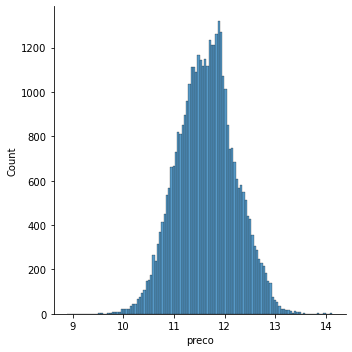

In [45]:
sns.displot(np.log1p(y));

In [46]:
# y = df_train['preco']
# X = df_train.drop(columns=['ID', 'preco'])
# cat_cols = df_train.select_dtypes(include=['object']).columns[1:]

# te = CountEncoder(cols=cat_cols, return_df=True)
# X_pp = te.fit_transform(df_train.drop(columns=['ID', 'preco']), df_train['preco'])

# X_pp = X_pp.fillna(0)

# xgb_tuned2 = XGBRegressor(subsample = 0.8, objective = 'reg:squarederror', n_estimators = 1500, min_child_weight = 5, max_depth = 6, gamma = 0.4, eval_metric = 'rmse', eta = 0.1, colsample_bytree = 0.7, booster = 'gbtree') 
xgb_tuned3 = xgb_tuned
xgb_tuned3.fit(X_pp, np.log1p(y))


# X_test_pp = te.transform(df_test.drop(columns=['ID']))
# X_test_pp = X_test_pp.fillna(0)

pred3_log = xgb_tuned3.predict(X_test_pp)


NameError: name 'pred3' is not defined

In [47]:
pred3 = np.expm1(pred3_log)

df_final = pd.concat([df_test[['ID']], pd.Series(pred3, name='preco')], axis=1)
df_final.head()

df_final.to_csv('submission3.csv', index=False)

In [48]:
MAE_tuned3 = cross_validate(xgb_tuned3, X_pp, np.log1p(y), cv=5 , scoring = 'neg_mean_absolute_error')

In [50]:
print(MAE_tuned3)
print(np.mean(np.expm1(MAE_tuned3['test_score'])))

{'fit_time': array([126.37681007, 199.88102603, 175.58742714, 108.64087105,
       226.87159967]), 'score_time': array([1.02905607, 1.35946584, 0.72597098, 0.73114896, 1.35124826]), 'test_score': array([-0.19669188, -0.19927124, -0.1984801 , -0.20009569, -0.20035608])}
-0.18043218080667828


## Modelo 4

In [51]:
xgb_tuned4 = XGBRegressor(n_estimators= 3000, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.3, min_child_weight= 3)

xgb_tuned4.fit(X_pp, np.log1p(y))


# X_test_pp = te.transform(df_test.drop(columns=['ID']))
# X_test_pp = X_test_pp.fillna(0)

pred4_log = xgb_tuned4.predict(X_test_pp)

In [ ]:
pred4 = np.expm1(pred4_log)

df_final = pd.concat([df_test[['ID']], pd.Series(pred4, name='preco')], axis=1)
df_final.head()

df_final.to_csv('submission4.csv', index=False)

## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators':[1500, 1750, 2000],
    'min_child_weight':[2,3,4,5], 
    'gamma':[i/10.0 for i in range(1,6)],
    'subsample':[i/10.0 for i in range(7,13)],
    'colsample_bytree':[i/10.0 for i in range(1,8)], 
    'max_depth': [6,7,8,9],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(1,6)],
}

reg = XGBRegressor(nthread=-1)

# run randomized search
# n_iter_search = 100
n_iter_search = 10
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

start = time.time()
random_search.fit(X_pp, np.log1p(y))
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))


## Sweetviz

In [27]:
import sweetviz as sv

ModuleNotFoundError: No module named 'sweetviz'

In [35]:
X_pp

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,...,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,8.0,6140,958,33,2017,2017.0,55672.0,30073,4,6426,...,False,False,29230,25548,12239,26223,21250,33658,7903,0.0
1,8.0,212,68,37,2017,2017.0,47858.0,30073,4,4458,...,False,False,29230,25548,12239,26223,18196,33658,7903,0.0
2,14.0,4020,817,158,2012,2013.0,122323.0,30073,4,21910,...,True,False,29230,25548,27207,13223,18196,33658,31543,0.0
3,8.0,470,46,9,2020,2021.0,14207.0,30073,2,6426,...,False,False,29230,25548,12239,13223,18196,33658,31543,0.0
4,8.0,363,47,7,2015,2016.0,43760.0,30073,4,4458,...,False,False,29230,25548,12239,13223,18196,33658,7903,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,12.0,6140,199,51,2015,2015.0,73755.0,6631,4,21910,...,False,False,29230,13898,27207,26223,21250,33658,31543,0.0
39442,17.0,2375,64,55,2016,2017.0,78859.0,30073,4,6570,...,True,False,29230,25548,27207,13223,18196,33658,31543,0.0
39443,8.0,2246,1924,1825,2021,2022.0,9793.0,30073,4,21910,...,False,False,10216,13898,12239,26223,21250,5788,7903,0.0
39444,15.0,6140,958,15,2018,2019.0,51592.0,30073,4,21910,...,False,False,29230,25548,27207,13223,18196,33658,31543,0.0
